#IMPORTS FOR SPARK AND OTHER PYTHON PACKAGES 

In [914]:
#Get spark/spark home from enviroment and execute spark
import os
import sys


In [915]:
#change the path here
MY_PY4j_PATH = 'C:\\spark-2.0.1-bin-hadoop2.7\\python\\lib\\py4j-0.10.3-src.zip'
spark_home = os.environ.get('SPARK_HOME', None)
print(spark_home)
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')

sys.path.insert(0, os.path.join(spark_home,
                                
                                'python'))

## may need to adjust on your system depending on which Spark version you're using and where you installed it.
sys.path.insert(0, os.path.join(spark_home, MY_PY4j_PATH)) 

execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))

C:\spark-2.0.1-bin-hadoop2.7
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.0.1
      /_/

Using Python version 2.7.12 (default, Jun 29 2016 11:07:13)
SparkSession available as 'spark'.


In [916]:
#change path here
#Directories
MY_VEHICLES_CSV_DATA_DIR = 'C:\\Users\\Aditya\\Desktop\\Big_Data_Analytics\\final_project\\Data\\'
vehicles_path = os.path.join(MY_VEHICLES_CSV_DATA_DIR, 'vehicles.csv')
emissions_path = os.path.join(MY_VEHICLES_CSV_DATA_DIR, 'emissions.csv')

In [917]:
#Necessary Import 
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from collections import defaultdict

In [918]:
import sys, getopt, pprint
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark import SparkConf
from pyspark import SparkContext
conf=(SparkConf().setMaster("local").setAppName("Cars").set("spark.executor.memory","1g"))
sqlContext = SQLContext(sc)

# DATA EXTRACTION AND MANIPULATION

In [919]:
vehicles = sc.textFile(vehicles_path)
print vehicles.count()

38033


In [920]:
header = vehicles.first()
fields = [StructField(field_name, StringType(), True) for field_name in header.split(',')]
print len(fields)

83


In [921]:
#create schema
schema = StructType(fields)
#vehicles file without header
vehicleHeader = vehicles.filter(lambda l: 'barrels08' in l)
vehcilesNoHeader = vehicles.subtract(vehicleHeader)
print vehcilesNoHeader.take(1)

[u'11.771785714285713,0.0,0.0,0.0,29,29.2472,0,0.0,0.0,0.0,0.0,312,-1,0.0,312.0,28,28.3029,0,0.0,0.0,0.0,0.0,6,3.5,All-Wheel Drive,51,,7,1400,0,Premium,Premium Gasoline,7,-1,27,27.2284,0,0.0,0.0,0.0,0.0,0,0,34387,0,0,Lexus,RX 450h AWD,Y,false,0,0,0,0.0,0.0,0.0,0.0,Auto(AV-S6),38.5412,0.0,38.601,0.0,Small Sport Utility Vehicle 4WD,2014,-750,,,,,Hybrid,,,288V Ni-MH,TYX,,0.0,,Tue Jan 01 00:00:00 EST 2013,Mon Sep 26 00:00:00 EDT 2016,Y,0,0,0']


In [922]:
vehicles_df = pd.read_csv(vehicles_path)
emission_df = pd.read_csv(emissions_path)

In [923]:
#prints information about dataframe along with percentage of null values
def getDfInfo(df):
    nrow = df.shape[0]
    print "\n*****SHAPE********"
    print df.shape
    print "*****NULL PERCENTAGE*********"
    print df.isnull().sum() / nrow

In [924]:
print getDfInfo(vehicles_df)


*****SHAPE********
(38032, 83)
*****NULL PERCENTAGE*********
barrels08          0.000000
barrelsA08         0.000000
charge120          0.000000
charge240          0.000000
city08             0.000000
city08U            0.000000
cityA08            0.000000
cityA08U           0.000000
cityCD             0.000000
cityE              0.000000
cityUF             0.000000
co2                0.000000
co2A               0.000000
co2TailpipeAGpm    0.000000
co2TailpipeGpm     0.000000
comb08             0.000000
comb08U            0.000000
combA08            0.000000
combA08U           0.000000
combE              0.000000
combinedCD         0.000000
combinedUF         0.000000
cylinders          0.003287
displ              0.003234
drive              0.031263
engId              0.000000
eng_dscr           0.404791
feScore            0.000000
fuelCost08         0.000000
fuelCostA08        0.000000
                     ...   
rangeCity          0.000000
rangeCityA         0.000000
rangeHwy      

# EXPLORATORY DATA ANALYSIS

In [925]:
#deleteing columns with more than 1 NA
vehicles_df= vehicles_df.dropna(thresh=len(vehicles_df) - 1, axis=1)

In [926]:
getDfInfo(vehicles_df)


*****SHAPE********
(38032, 66)
*****NULL PERCENTAGE*********
barrels08          0
barrelsA08         0
charge120          0
charge240          0
city08             0
city08U            0
cityA08            0
cityA08U           0
cityCD             0
cityE              0
cityUF             0
co2                0
co2A               0
co2TailpipeAGpm    0
co2TailpipeGpm     0
comb08             0
comb08U            0
combA08            0
combA08U           0
combE              0
combinedCD         0
combinedUF         0
engId              0
feScore            0
fuelCost08         0
fuelCostA08        0
fuelType           0
fuelType1          0
ghgScore           0
ghgScoreA          0
                  ..
highwayUF          0
hlv                0
hpv                0
id                 0
lv2                0
lv4                0
make               0
model              0
mpgData            0
phevBlended        0
pv2                0
pv4                0
range              0
rangeCity     

In [927]:
vehicle_emission_df = pd.merge(vehicles_df, emission_df[['score','scoreAlt','id']], how ='left', 
                                                      on=['id'])

In [928]:
vehicle_emission_df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb,score,scoreAlt
0,15.695714,0,0,0,19,0,0,0,0,0,...,1985,-1500,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,NaN,NaN
1,29.964545,0,0,0,9,0,0,0,0,0,...,1985,-8500,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,NaN,NaN
2,12.207778,0,0,0,23,0,0,0,0,0,...,1985,250,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,NaN,NaN
3,29.964545,0,0,0,10,0,0,0,0,0,...,1985,-8500,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,NaN,NaN
4,17.347895,0,0,0,17,0,0,0,0,0,...,1993,-4250,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0,NaN,NaN


In [929]:
makecount = pd.value_counts(vehicle_emission_df['make'].values, sort=False)
makecount = makecount.to_frame().reset_index()
makecount.columns = ('make','count')
makecount = makecount[makecount['count']>500]

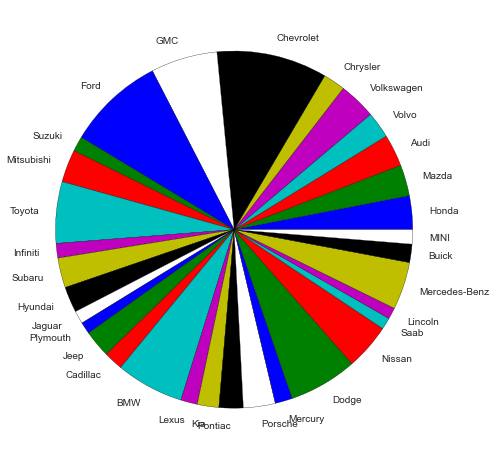

In [930]:
plt.figure(figsize=(8, 8))
pie(makecount['count'], labels=makecount['make']);
show()

In [931]:
vclass_co2_df = vehicle_emission_df[vehicle_emission_df['co2'] >= 0]
vclass_co2_df=pd.DataFrame(vclass_co2_df.groupby(vclass_co2_df['VClass'])['co2'].mean().reset_index())


In [932]:
group_data1 = vclass_co2_df.sort('co2',ascending=False)[0:5]

In [933]:
group_data2 = vclass_co2_df.sort('co2',ascending=True)[0:5]

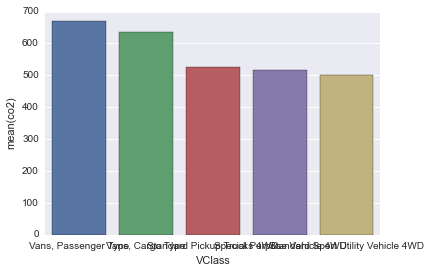

In [934]:
#5 Car vehicle class with highest CO2 emission
sns.barplot(x='VClass', y='co2', data=group_data1 , label='make')
plt.figure(figsize=(8, 8))
plt.savefig("Car_vehicle_class_highest_CO2_emission.png")

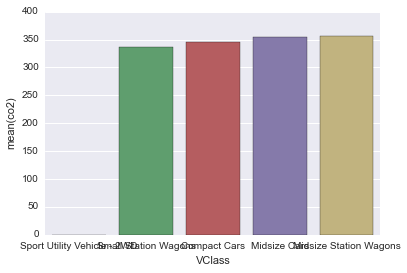

In [935]:
#5 Car vehicle class with lowest CO2 emission
sns.barplot(x='VClass', y='co2', data=group_data2)
plt.figure(figsize=(8, 8))
#change path here

plt.savefig("Car_vehicle_class_with_lowest_CO2_emission.png")

In [936]:
make_co2_df = vehicle_emission_df[vehicle_emission_df['co2'] >= 0]
make_co2_df=pd.DataFrame(make_co2_df.groupby(make_co2_df['make'])['co2'].mean().reset_index())


In [937]:
group_data1 = make_co2_df.sort('co2',ascending=False)[0:5]

In [938]:
group_data2 = make_co2_df.sort('co2',ascending=True)[0:5]

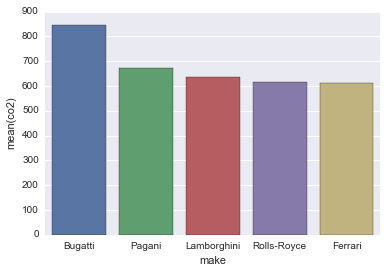

In [939]:
#5 Car vehicle class with highest CO2 emission
sns.barplot(x='make', y='co2', data=group_data1 , label='make')
plt.figure(figsize=(8, 8))
#change path here

plt.savefig("Car_vehicle_make_highest_CO2_emission.png")

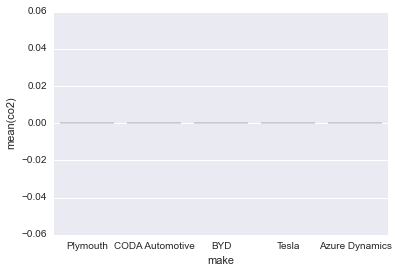

In [940]:
#5 Car vehicle class with lowest CO2 emission
sns.barplot(x='make', y='co2', data=group_data2)
plt.figure(figsize=(8, 8))
#change path here

plt.savefig("Car_vehicle_make_with_lowest_CO2_emission.png")

In [941]:
fuel_type_co2_df = vehicle_emission_df[vehicle_emission_df['co2'] >= 0]
fuel_type_co2_df=pd.DataFrame(fuel_type_co2_df.groupby(fuel_type_co2_df['fuelType'])['co2'].mean().reset_index())



In [942]:
group_data1 = fuel_type_co2_df.sort('co2',ascending=False)[0:5]
group_data2 = fuel_type_co2_df.sort('co2',ascending=True)[0:5]

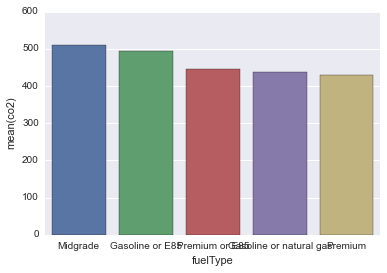

In [943]:
#5 Car vehicle fuel type with highest CO2 emission
sns.barplot(x='fuelType', y='co2', data=group_data1 , label='Fuel Type')
#change path here

plt.savefig("Car_vehicle_fuel_type_highest_CO2_emission.png")

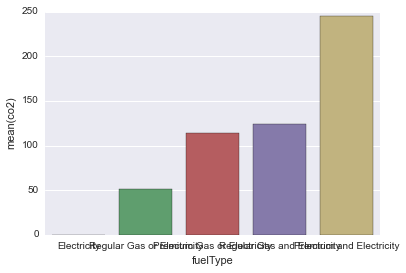

In [944]:
#5 Car vehicle fuel type with lowest CO2 emission
sns.barplot(x='fuelType', y='co2', data=group_data2)
#change path here
plt.savefig("Car_vehicle_fuel_type_with_lowest_CO2_emission.png")

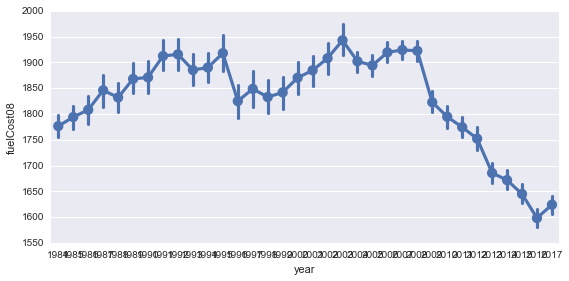

In [945]:

#How You save spend has varied over years

sns.factorplot(data=vehicle_emission_df, x="year", y="fuelCost08",size=4, aspect=2,label = 'FuelCost vs Year')  
#change path here

plt.savefig("fuelCostOvertheYears.png")


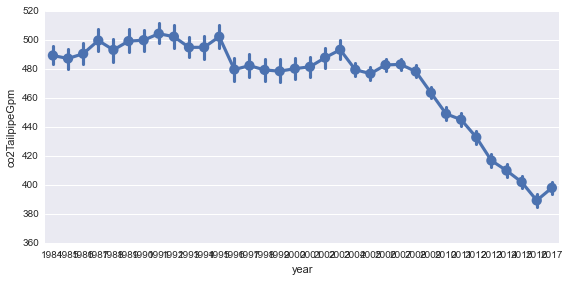

In [946]:
sns.factorplot(data=vehicle_emission_df, x="year", y="co2TailpipeGpm",size=4, aspect=2,label = 'co2TailPipe vs Year')  
#change path here

plt.savefig("co2OvertheYears.png")

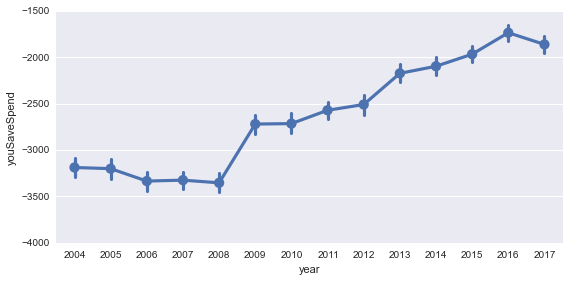

In [947]:
#As score ranges from 1 to 10 remove rows having -2 and -12
vehicle_emission_df_save_spend  = vehicle_emission_df[vehicle_emission_df.score>0]
sns.factorplot(data=vehicle_emission_df_save_spend, x="year", y="youSaveSpend",size=4, aspect=2,label = 'SaveSpend vs Year')
#change path here

plt.savefig("youSaveSpendOverYears.png")

# FEATURE EXTRACTION FOR MODELLING

In [948]:
#Modelling Data to predict 

#Feature Selection 
#removing columns with NA and replacing -1 with 0 i.e. missing data
vehicle_emission_df= vehicle_emission_df.dropna(axis=0)
vehicle_emission_df = vehicle_emission_df.replace(-1,0)

In [949]:
#prints information about dataframe along with percentage of null values
def getDfZeroInfo(df):
    nrow = df.shape[0]
    print "\n*****SHAPE********"
    print df.shape
    print "*****Zero PERCENTAGE*********"
    print (df.shape[0] - df.astype(bool).sum(axis=0))/nrow
getDfZeroInfo(vehicle_emission_df)


*****SHAPE********
(31397, 68)
*****Zero PERCENTAGE*********
barrels08          0.000000
barrelsA08         0.933401
charge120          1.000000
charge240          0.990795
city08             0.000000
city08U            0.455075
cityA08            0.933401
cityA08U           0.948148
cityCD             0.999236
cityE              0.990795
cityUF             0.996051
co2                0.606491
co2A               0.968819
co2TailpipeAGpm    0.937351
co2TailpipeGpm     0.005255
comb08             0.000000
comb08U            0.455075
combA08            0.933401
combA08U           0.948148
combE              0.990795
combinedCD         0.998981
combinedUF         0.996051
engId              0.394974
feScore            0.602032
fuelCost08         0.000000
fuelCostA08        0.935726
fuelType           0.000000
fuelType1          0.000000
ghgScore           0.602032
ghgScoreA          0.967067
                     ...   
hpv                0.920056
id                 0.000000
lv2           

In [950]:
#Selecting columns with less than 30% of zeroes in their data 
columns_to_select = (vehicle_emission_df.shape[0] - vehicle_emission_df.astype(bool).sum(axis=0))/vehicle_emission_df.shape[0]
columns_to_select = np.where(columns_to_select.values<0.30,columns_to_select.index,None)
columns_to_select = columns_to_select[columns_to_select != np.array(None)]
print columns_to_select

['barrels08' 'city08' 'co2TailpipeGpm' 'comb08' 'fuelCost08' 'fuelType'
 'fuelType1' 'highway08' 'id' 'make' 'model' 'mpgData' 'UCity' 'UHighway'
 'VClass' 'year' 'youSaveSpend' 'createdOn' 'modifiedOn' 'score']


In [951]:
#Removing ids and dates as they do not contribute to our prediction
vehicle_emission_df = vehicle_emission_df[['barrels08', 'city08', 'co2TailpipeGpm' ,'comb08'
, 'fuelCost08' ,'fuelType' ,'fuelType1' ,'highway08','make',
 'model' ,'UCity' ,'UHighway' ,'VClass' ,'year', 'youSaveSpend', 'score']]

In [952]:
getDfInfo(vehicle_emission_df)


*****SHAPE********
(31397, 16)
*****NULL PERCENTAGE*********
barrels08         0
city08            0
co2TailpipeGpm    0
comb08            0
fuelCost08        0
fuelType          0
fuelType1         0
highway08         0
make              0
model             0
UCity             0
UHighway          0
VClass            0
year              0
youSaveSpend      0
score             0
dtype: float64


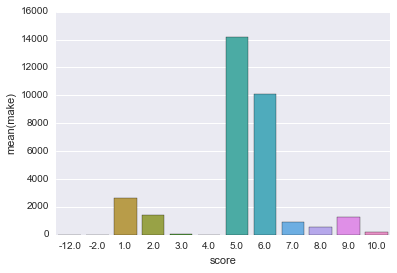

In [953]:
#5 Distribution of Class variable
count_of_class_df=pd.DataFrame(vehicle_emission_df.groupby(vehicle_emission_df['score']).count().reset_index())
sns.barplot(x='score', y='make', data=count_of_class_df , label='Count of Scores')
#change path here

plt.savefig("Distribution_of_Scores.png")

In [954]:
#preprocessing data
#converting all categorical to discrete
vehicle_emission_df = vehicle_emission_df[vehicle_emission_df['score']>0]
d = defaultdict(preprocessing.LabelEncoder)
vehicle_emission_encoded_df = vehicle_emission_df[['fuelType' ,'fuelType1','make',
 'model' ,'VClass' ,'year']].apply(lambda x: d[x.name].fit_transform(x))

vehicle_emission_encoded_df_full = vehicle_emission_encoded_df.join(vehicle_emission_df[['barrels08', 'city08', 'co2TailpipeGpm' ,'comb08'
, 'fuelCost08' , 'highway08', 'UCity' ,'UHighway' , 'youSaveSpend','score']])

vehicle_emission_encoded_df_full.head()
# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))



,fuelType,fuelType1,make,model,VClass,year,barrels08,city08,co2TailpipeGpm,comb08,fuelCost08,highway08,UCity,UHighway,youSaveSpend,score
10370,6,4,0,1436,21,0,18.311667,16,493.722222,18,2200,22,19.4,31.0,-4750,1
10371,6,4,0,1436,21,0,18.311667,16,493.722222,18,2200,22,19.4,31.0,-4750,1
10372,6,4,0,1436,21,0,18.311667,16,493.722222,18,2200,22,19.3,31.1,-4750,1
10373,6,4,0,1436,21,0,18.311667,16,493.722222,18,2200,22,19.3,31.1,-4750,1
10374,6,4,3,1955,21,0,15.695714,18,423.190476,21,1900,26,22.0,36.2,-3250,1


# DATA MODELING

In [955]:
#train test split
vehicle_emission = vehicle_emission_encoded_df_full.ix[:,0:15]
vehicle_emission_score = vehicle_emission_encoded_df_full.ix[:,15:16]
X_train, X_test, y_train, y_test = train_test_split(vehicle_emission, vehicle_emission_score, test_size=0.2, random_state=0)
X_train.shape

(25101, 15)

In [956]:
#normalizing the data on X_train and X_test
min_max=preprocessing.MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['barrels08', 'city08', 'co2TailpipeGpm' ,'comb08'
, 'fuelCost08' , 'highway08', 'UCity' ,'UHighway' , 'youSaveSpend']])
X_test_minmax=min_max.fit_transform(X_test[['barrels08', 'city08', 'co2TailpipeGpm' ,'comb08'
, 'fuelCost08' , 'highway08', 'UCity' ,'UHighway' , 'youSaveSpend']])
X_train_minmax

array([[ 0.42763372,  0.07692308,  0.42027681, ...,  0.07227234,
         0.15972222,  0.74358974],
       [ 0.49917951,  0.05384615,  0.5       , ...,  0.04942153,
         0.11527778,  0.57692308],
       [ 0.44909746,  0.07692308,  0.44964555, ...,  0.07010045,
         0.12037431,  0.62820513],
       ..., 
       [ 0.44909746,  0.06923077,  0.45      , ...,  0.05987392,
         0.13750278,  0.62820513],
       [ 0.44909746,  0.06923077,  0.45      , ...,  0.06496487,
         0.12826667,  0.62820513],
       [ 0.44909746,  0.06923077,  0.45      , ...,  0.06430113,
         0.1375    ,  0.62820513]])

In [957]:
#let's consider the base class
y_train.score.value_counts()/y_train.score.count() 


5     0.452094
6     0.322338
1     0.085017
2     0.045656
9     0.040835
7     0.028206
8     0.017967
10    0.005617
3     0.002191
4     0.000080
dtype: float64

In [958]:
#KNN on MultiClass
knn=KNeighborsClassifier(n_neighbors=10)
y_pred = knn.fit(X_train_minmax,y_train.values.ravel()).predict(X_test_minmax)
print accuracy_score(y_test,y_pred)
print classification_report(y_test, y_pred) 

0.416985340982
             precision    recall  f1-score   support

        1.0       0.13      0.11      0.12       520
        2.0       0.24      0.36      0.29       264
        3.0       0.00      0.00      0.00        12
        5.0       0.50      0.60      0.55      2859
        6.0       0.38      0.34      0.36      2017
        7.0       0.27      0.19      0.22       177
        8.0       0.27      0.02      0.04       129
        9.0       0.29      0.04      0.06       274
       10.0       1.00      1.00      1.00        24

avg / total       0.40      0.42      0.40      6276



In [959]:
#Multinomial NB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train_minmax, y_train.values.ravel()).predict(X_test_minmax)
print '********Multinomial Naive Bayes***********'
print accuracy_score(y_test,y_pred)
print classification_report(y_test, y_pred) 

********Multinomial Naive Bayes***********
0.458094327597
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00       520
        2.0       0.00      0.00      0.00       264
        3.0       0.00      0.00      0.00        12
        5.0       0.46      1.00      0.63      2859
        6.0       0.00      0.00      0.00      2017
        7.0       0.00      0.00      0.00       177
        8.0       0.00      0.00      0.00       129
        9.0       0.00      0.00      0.00       274
       10.0       1.00      0.67      0.80        24

avg / total       0.21      0.46      0.29      6276



In [960]:
#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
y_pred = clf.fit(X_train_minmax, y_train.values.ravel()).predict(X_test_minmax)
print '********Random Forest Classifier***********'
print accuracy_score(y_test,y_pred)
print classification_report(y_test, y_pred)

********Random Forest Classifier***********
0.41459528362
             precision    recall  f1-score   support

        1.0       0.16      0.08      0.10       520
        2.0       0.23      0.27      0.25       264
        3.0       0.00      0.00      0.00        12
        5.0       0.52      0.44      0.48      2859
        6.0       0.37      0.57      0.45      2017
        7.0       0.29      0.14      0.18       177
        8.0       0.32      0.12      0.17       129
        9.0       0.35      0.03      0.06       274
       10.0       1.00      1.00      1.00        24

avg / total       0.41      0.41      0.40      6276



In [961]:
#Logistic Regression
lg = LogisticRegression(multi_class = 'multinomial',solver='newton-cg')
y_pred = lg.fit(X_train_minmax, y_train.values.ravel()).predict(X_test_minmax)
print '********Logistic Regression Classifier***********'
print accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

********Logistic Regression Classifier***********
0.481835564054
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00       520
        2.0       0.59      0.09      0.15       264
        3.0       0.00      0.00      0.00        12
        5.0       0.49      0.89      0.63      2859
        6.0       0.43      0.20      0.27      2017
        7.0       0.41      0.10      0.16       177
        8.0       0.00      0.00      0.00       129
        9.0       0.21      0.04      0.06       274
       10.0       1.00      0.96      0.98        24

avg / total       0.41      0.48      0.39      6276



In [962]:
#Support Vector Machines
svc = SVC()
y_pred = svc.fit(X_train_minmax, y_train.values.ravel()).predict(X_test_minmax)
print '********Support Vector Machines Classifier***********'
print accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

********Support Vector Machines Classifier***********
0.459209687699
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00       520
        2.0       0.00      0.00      0.00       264
        3.0       0.00      0.00      0.00        12
        5.0       0.46      1.00      0.63      2859
        6.0       0.00      0.00      0.00      2017
        7.0       0.00      0.00      0.00       177
        8.0       0.00      0.00      0.00       129
        9.0       0.00      0.00      0.00       274
       10.0       1.00      0.96      0.98        24

avg / total       0.21      0.46      0.29      6276



In [963]:
#Decision Tree Classifier
dc = DecisionTreeClassifier()
y_pred = dc.fit(X_train_minmax, y_train.values.ravel()).predict(X_test_minmax)
print '********Decision Tree Classifier***********'
print accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

********Decision Tree Classifier***********
0.378266411727
             precision    recall  f1-score   support

        1.0       0.14      0.16      0.15       520
        2.0       0.17      0.31      0.22       264
        3.0       0.00      0.00      0.00        12
        4.0       0.00      0.00      0.00         0
        5.0       0.48      0.50      0.49      2859
        6.0       0.37      0.34      0.36      2017
        7.0       0.25      0.25      0.25       177
        8.0       0.24      0.06      0.10       129
        9.0       0.13      0.02      0.04       274
       10.0       1.00      1.00      1.00        24

avg / total       0.38      0.38      0.37      6276



# Exporting Data for Visualizations using D3.js  

In [ ]:
make_emission = pd.DataFrame(vehicle_emission_df.groupby(['make'])['co2TailpipeGpm'].sum())
make_emission.to_csv('make_emission.csv')